In [1]:
import numpy as np
from bnb.problem import OptimizationProblem
from matplotlib import pyplot as plt
import matplotlib
from scipy.optimize import minimize
import pandas as pd
import warnings
import seaborn as sns
from bnb.fml_solver import FMLSolver
sns.set()
matplotlib.rcParams.update({'font.size': 11, 'font.family': 'serif'})

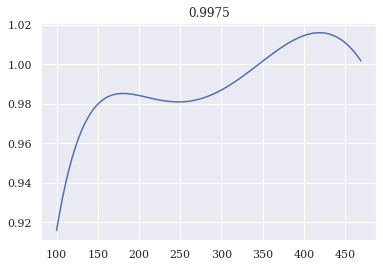

In [2]:
class GradientDescent(OptimizationProblem):
    
    def solve():
        minimize(lambda p: - problem.objective_function(p), np.asarray([30]))
    
    def objective_function(self, p):
        return np.sum([
            segment.w * np.sum(p * segment.purchase_probabilities(p))
            for segment in self.segments
        ])

    
# for w_ in np.linspace(0.99, 1, 30):
a = np.asarray([[-4], [6]])
b = np.asarray([0.01])
w_ = 0.9975
w = np.asarray([w_, 1 - w_])
problem = GradientDescent(a, b, w)

p = np.linspace(problem.p_lb, problem.p_ub, 100)
y = [problem.objective_function(np.asarray([p_])) for p_ in p]

plt.plot(p, y)
plt.title(w_)
plt.show()



In [ ]:
class GradientDescent(OptimizationProblem):
    
    def objective_function(self, p):
        return np.sum([
            segment.w * np.sum(p * segment.purchase_probabilities(p))
            for segment in self.segments
        ])

    
for w_ in np.linspace(0.9, 1.0, 100)[:-1]:
# for w_ in [0.9828282828282828]:
    a = np.asarray([[-4, -2, 0, -2, -1], [5.5, 7, 6, 5, 4]])
    b = np.asarray([0.01, 0.001, 0.05, 0.075, 0.1])
    w = np.asarray([w_, 1 - w_])
    problem = GradientDescent(a, b, w)
    solutions = []
    for _ in range(100):
        p_start = np.random.uniform(problem.p_lb, problem.p_ub)
        sol = minimize(
            lambda p: - problem.objective_function(p),
            p_start,
            method="Nelder-Mead",
            options={"maxfev": 10000}
        )
        assert sol.success
        solutions.append(-sol.fun)
    min_, max_ = np.min(solutions), np.max(solutions)
    if max_ - min_ > 1.0:
        print(w_)
        print(min_, max_)
        plt.hist(solutions)
        plt.show()


In [9]:
class GradientDescent(OptimizationProblem):
    
    def objective_function(self, p):
        return np.sum([
            segment.w * np.sum(p * segment.purchase_probabilities(p))
            for segment in self.segments
        ])

    

while True:
    
    w_ = np.random.uniform(0, 1)
    a = np.asarray([
        np.random.uniform(-4, 0, size=5),
        np.random.uniform(7, 9, size=5),
    ])
    b = np.random.uniform(0.001, 0.1, size=5)
    w = np.asarray([w_, 1 - w_])
    problem = GradientDescent(a, b, w)
    solutions = []
    for _ in range(50):
        p_start = np.random.uniform(problem.p_lb, problem.p_ub)
        sol = minimize(
            lambda p: - problem.objective_function(p),
            p_start,
            method="Nelder-Mead",
            options={"maxfev": 10000}
        )
        if sol.success:
            solutions.append(-sol.fun)
    solutions = np.asarray(solutions)
    min_, max_ = np.min(solutions), np.max(solutions)
    fraction_wrong = np.mean(solutions < max_ * 0.9)
    if fraction_wrong > 0.9:
        raise Exception("found it")

KeyboardInterrupt: 

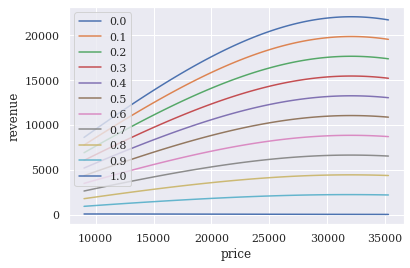

In [23]:
class GradientDescent(OptimizationProblem):
    
    def objective_function(self, p):
        return np.sum([
            segment.w * np.sum(p * segment.purchase_probabilities(p))
            for segment in self.segments
        ])

    
    
_, ax = plt.subplots()
for w_ in np.linspace(0, 1, 11):
    a = np.asarray([[-4], [4]])
    b = np.asarray([0.0001])
    w = np.asarray([w_, 1 - w_])
    problem = GradientDescent(a, b, w)

    p = np.linspace(0.9 * problem.p_lb, problem.p_ub * 1.1, 100)
    y = [problem.objective_function(np.asarray([p_])) for p_ in p]

    ax.plot(p, y, label=np.round(w_, 1))
#     plt.title(w_)

plt.ylabel("revenue")
plt.xlabel("price")
plt.legend()
plt.show()

#     minimize(lambda p: - problem.objective_function(p), np.asarray([30]))

In [60]:
m, n = 2, 20

w_ = np.random.uniform(0, 1)
a = np.random.uniform(0, 20, size=(m, n))
b = np.random.uniform(0.001, 0.1, size=n)
w = np.asarray([w_, 1 - w_])
problem = OptimizationProblem(a, b, w)


p_lb = np.min(np.asarray([segment.p_opt for segment in problem.segments]), axis=0)

for i in range(n):
    print("product: ", i)
    p_lb_ = np.copy(problem.p_lb)
    p_lb_[i] = p_lb[i]
    x_lb = np.asarray([segment.no_purchase_probability(p_lb_) for segment in problem.segments])    
    print(x_lb)
    print(problem.x_lb)

product:  0
[6.43266906e-09 2.13181317e-08]
[6.43262288e-09 2.13181303e-08]
product:  1
[6.43262321e-09 2.13181325e-08]
[6.43262288e-09 2.13181303e-08]
product:  2
[1.44947124e-08 2.13181315e-08]
[6.43262288e-09 2.13181303e-08]
product:  3
[6.43265852e-09 2.13181317e-08]
[6.43262288e-09 2.13181303e-08]
product:  4
[6.43622533e-09 2.16656051e-08]
[6.43262288e-09 2.13181303e-08]
product:  5
[6.75763101e-09 2.13186980e-08]
[6.43262288e-09 2.13181303e-08]
product:  6
[6.49665566e-09 2.13183162e-08]
[6.43262288e-09 2.13181303e-08]
product:  7
[6.45541420e-09 2.18369943e-08]
[6.43262288e-09 2.13181303e-08]
product:  8
[6.43320108e-09 2.13183085e-08]
[6.43262288e-09 2.13181303e-08]
product:  9
[6.72635769e-09 2.13185199e-08]
[6.43262288e-09 2.13181303e-08]
product:  10
[6.45601328e-09 2.13233765e-08]
[6.43262288e-09 2.13181303e-08]
product:  11
[6.43262321e-09 2.13181323e-08]
[6.43262288e-09 2.13181303e-08]
product:  12
[8.95174135e-09 2.13181385e-08]
[6.43262288e-09 2.13181303e-08]
product: 

array([6.23555507e-01, 2.64385877e-04])